# Time Series

In [1]:
import pandas as pd
import seaborn as sns

## (1) Oslo city bike

**(1.1) Download the September 2022 city bike data here https://oslobysykkel.no/en/open-data/historical. Import the dataset and set the column <code>started_at</code> as DatetimeIndex.**<br> 
(The description of each column can be found on the same page.)

In [2]:
bike_raw_df = pd.read_csv("../dataset/oslo_bike.csv", parse_dates = ["started_at"], index_col  = [0])
bike_raw_df.head(5)

,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
started_at,,,,,,,,,,,,
2022-09-01 03:04:31.178000+00:00,2022-09-01 03:13:01.298000+00:00,510,437,Sentrum Scene,ved Arbeidersamfunnets plass,59.915468,10.751141,583,Galgeberg,langs St. Halvards gate,59.907076,10.779164
2022-09-01 03:11:09.104000+00:00,2022-09-01 03:14:52.506000+00:00,223,578,Hallings gate,langs Dalsbergstien,59.922777,10.738655,499,Bjerregaards gate,ovenfor Fredrikke Qvams gate,59.925488,10.746058
2022-09-01 03:11:37.861000+00:00,2022-09-01 03:23:23.939000+00:00,706,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,390,Saga Kino,langs Olav Vs gate,59.914240,10.732771
2022-09-01 03:13:00.843000+00:00,2022-09-01 03:17:17.639000+00:00,256,735,Oslo Hospital,ved trikkestoppet,59.903213,10.767344,465,Bjørvika,under broen Nylandsveien,59.909006,10.756180
2022-09-01 03:13:13.330000+00:00,2022-09-01 03:24:15.758000+00:00,662,525,Myraløkka Øst,ved Bentsenbrua,59.937205,10.760581,443,Sjøsiden ved trappen,Oslo S,59.910154,10.751981


**(1.2) Select a subset with two columns: <code>duration</code> and <code>start_station_name</code>. Use this subset to solve the following tasks.**<br>
Hint: <code>copy()</code>

In [3]:
bike_df = bike_raw_df[["duration", "start_station_name"]].copy()
bike_df.head(5)

,duration,start_station_name
started_at,,
2022-09-01 03:04:31.178000+00:00,510,Sentrum Scene
2022-09-01 03:11:09.104000+00:00,223,Hallings gate
2022-09-01 03:11:37.861000+00:00,706,Alexander Kiellands Plass
2022-09-01 03:13:00.843000+00:00,256,Oslo Hospital
2022-09-01 03:13:13.330000+00:00,662,Myraløkka Øst


**(1.3) Use a line chart to show the riding time for each trip between 8 a.m. and 11 a.m. on September 10.**<br>
Hint: Use column <code>duration</code><br>
Setting: figsize = (18,3)

<AxesSubplot:xlabel='started_at'>

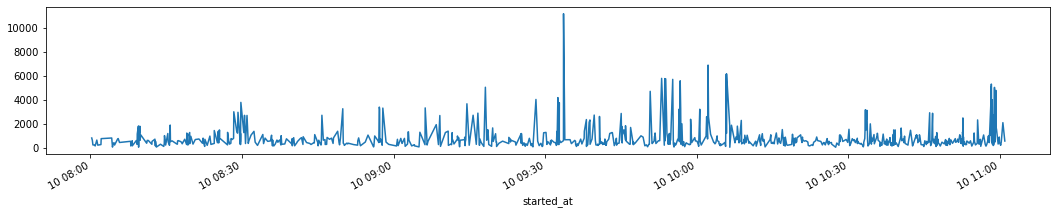

In [4]:
bike_df.loc["2022-09-10 08:00":"2022-09-10 11:00","duration"].plot(figsize = (18,3))

**(1.4) How many trips departed from <code>Olaf Ryes plass</code> Station on September 10?**

In [5]:
bike_df[bike_df.start_station_name == "Olaf Ryes plass"].loc["2022-09-10",:].shape[0]

68

**(1.5) Calculate the total riding time per day and use a horizontal bar chart to display the result.**<br>
Hint: Use <code>resample()</code><br>

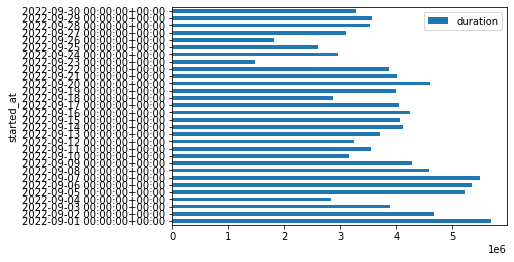

In [6]:
bike_daily = bike_df.resample("D").sum().plot(kind = "barh")

**(1.6) Extract the day of the week from the DatetimeIndex and add it a as new column named <code>day_of_week</code>.**

In [7]:
bike_df["day_of_week"] = bike_df.index.day_name()
bike_df.head(5)

,duration,start_station_name,day_of_week
started_at,,,
2022-09-01 03:04:31.178000+00:00,510,Sentrum Scene,Thursday
2022-09-01 03:11:09.104000+00:00,223,Hallings gate,Thursday
2022-09-01 03:11:37.861000+00:00,706,Alexander Kiellands Plass,Thursday
2022-09-01 03:13:00.843000+00:00,256,Oslo Hospital,Thursday
2022-09-01 03:13:13.330000+00:00,662,Myraløkka Øst,Thursday


**(1.7) Group the data from September 3 to 30 by the column <code>day_of_week</code>. Calcuate the number of trips for each group. Which day of the week has the most trips?**

In [8]:
bike_df.loc["2022-09-03":"2022-09-30",:].groupby("day_of_week").size()

day_of_week
Friday       20294
Monday       21929
Saturday     18172
Sunday       14376
Thursday     25217
Tuesday      25568
Wednesday    26297
dtype: int64

**Write you answer here:** Wednesday 
    

**(1.8) Which day of the week has the longest average riding time?**<br>
Hint: Use the data from September 3 to 30.

In [9]:
bike_df.loc["2022-09-03":"2022-09-30",:].groupby("day_of_week").mean()

,duration
day_of_week,
Friday,652.981669
Monday,651.336860
Saturday,772.778560
Sunday,824.168753
Thursday,637.660546
Tuesday,654.414385
Wednesday,651.366011


**Write you answer here:** Sunday
    

**(1.9) Count the number of departures from the following stations on each day of the week in September.**<br>
<code>Alexander Kiellands Plass, Ringnes Park, Olaf Ryes plass, Tøyen skole, Bislett Stadion, Jernbanetorget, BI Nydalen.</code>   
Expected result:

||Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday|
|-:-|-:-|-:-|-:-|-:-|-:-|-:-|-:-|
|**Alexander Kiellands Plass**|234|298|...|...|...|...|...|   
|**BI Nydalen**|117|...|...|...|...|...|...|   
|**Bislett Stadion**|...|...|...|...|...|...|     
|**Jernbanetorget**|...|...|...|...|...|...|     
|**Olaf Ryes plass**|...|...|...|...|...|...|    
|**Ringnes Park**|...|...|...|...|...|...|    
|**Tøyen skole**|...|...|...|...|...|...|    

In [10]:
bike_df_sub = bike_df[bike_df.start_station_name.isin(["Alexander Kiellands Plass", "Ringnes Park", "Olaf Ryes plass", "Tøyen skole", "Bislett Stadion", "Jernbanetorget", "BI Nydalen"])]
bike_ct = pd.crosstab(bike_df_sub["start_station_name"], bike_df_sub["day_of_week"])
bike_ct = bike_ct[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]] #rearrange column order
bike_ct

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
start_station_name,,,,,,,
Alexander Kiellands Plass,234,298,313,439,409,246,194
BI Nydalen,117,126,128,109,63,82,111
Bislett Stadion,252,251,286,370,295,178,136
Jernbanetorget,146,165,170,240,198,80,100
Olaf Ryes plass,213,274,274,404,343,231,179
Ringnes Park,211,331,303,354,336,253,182
Tøyen skole,236,264,295,367,249,160,159


**(1.10) Use a heatmap to display the result obtained in (1.8). List the two stations with the most trips on Thursday.**

<AxesSubplot:xlabel='day_of_week', ylabel='start_station_name'>

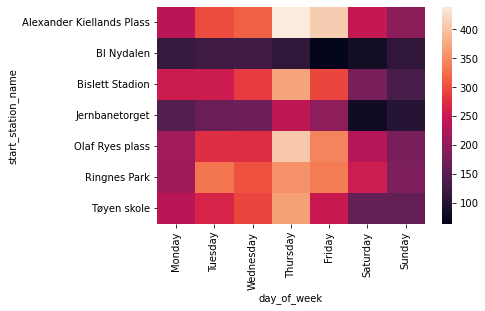

In [11]:
sns.heatmap(bike_ct)

**Write you answer here:** "Alexander Kiellands Plass" and "Olaf Ryes plass"
    

**(1.11) Calculate the number of trips in each hour on September 10.**

In [12]:
bike_df.loc["2022-09-10"].resample("H").size()

started_at
2022-09-10 03:00:00+00:00     11
2022-09-10 04:00:00+00:00     34
2022-09-10 05:00:00+00:00     57
2022-09-10 06:00:00+00:00     85
2022-09-10 07:00:00+00:00    174
2022-09-10 08:00:00+00:00    211
2022-09-10 09:00:00+00:00    266
2022-09-10 10:00:00+00:00    385
2022-09-10 11:00:00+00:00    369
2022-09-10 12:00:00+00:00    337
2022-09-10 13:00:00+00:00    376
2022-09-10 14:00:00+00:00    343
2022-09-10 15:00:00+00:00    381
2022-09-10 16:00:00+00:00    342
2022-09-10 17:00:00+00:00    253
2022-09-10 18:00:00+00:00    155
2022-09-10 19:00:00+00:00    120
2022-09-10 20:00:00+00:00    102
2022-09-10 21:00:00+00:00    122
2022-09-10 22:00:00+00:00    120
2022-09-10 23:00:00+00:00      1
Freq: H, dtype: int64

**(1.12) Use a horizontal bar chart to display the result obtained in (1.11).**

<AxesSubplot:ylabel='started_at'>

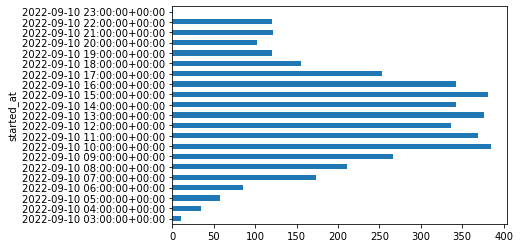

In [13]:
bike_df.loc["2022-09-10"].resample("H").size().plot(kind="barh")

## (2) Complains
In the US, 311 is a non-emergency phone number that people can call in many cities to find information about services, make complaints, or report problems like graffiti or road damage.


**(2.1) Import the dataset <code>complaints.csv</code>. Set the column <code>Created Date</code> as DatetimeIndex.**<br>

In [14]:
# You may see a warning message: Columns (8) have mixed types. 
# This is because pandas will try to guess the dtype, and if there is confusion, you will see a warning message.
# You can specify the type to avoid seeing this warning message.
complaint_df = pd.read_csv("../dataset/complaints.csv", parse_dates = ["Created Date"], index_col = [1], dtype = {"Incident Zip":object})
complaint_df.head(5)

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2013-10-31 02:08:41,26589651,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
2013-10-31 02:01:04,26593698,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2013-10-31 02:00:24,26594139,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
2013-10-31 01:56:23,26595721,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
2013-10-31 01:53:44,26590930,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


**(2.2) Sort the dataframe from oldest to newest.**<br>
Hint: <code>DataFrame.sort_index(inplace = True)</code>

In [15]:
complaint_df.sort_index(inplace = True)
complaint_df.head(5)

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2013-10-04 00:00:10,26428033,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024,-73.900717,"(40.640024057399216, -73.90071711703163)"
2013-10-04 00:00:28,26426115,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"
2013-10-04 00:00:45,26428987,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
2013-10-04 00:01:05,26428083,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160,-73.767353,"(40.656160351546845, -73.76735262738222)"
2013-10-04 00:01:13,26426013,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**(2.3) Select the complaint data handled by <code>NYPD</code> with two columns: <code>Closed Date, Complaint Type</code>. Use this subset to solve the following tasks.**<br>
Hint: Use column <code>Agency</code> and make a copy.

In [16]:
nypd_df = complaint_df[complaint_df.Agency == "NYPD"].loc[:,["Closed Date", "Complaint Type"]].copy()
nypd_df.head(5)

,Closed Date,Complaint Type
Created Date,,
2013-10-04 00:00:10,10/04/2013 01:20:52 AM,Blocked Driveway
2013-10-04 00:00:28,10/04/2013 04:17:32 AM,Noise - Commercial
2013-10-04 00:00:45,10/04/2013 01:25:01 AM,Noise - Street/Sidewalk
2013-10-04 00:01:05,10/04/2013 02:13:50 AM,Illegal Parking
2013-10-04 00:03:00,10/04/2013 02:14:57 AM,Noise - Commercial


**(2.4) Calculate the number of complaints in each day and display the result with a line chart.**<br>
Setting: figsize = (15,3), marker = "o"

<AxesSubplot:xlabel='Created Date'>

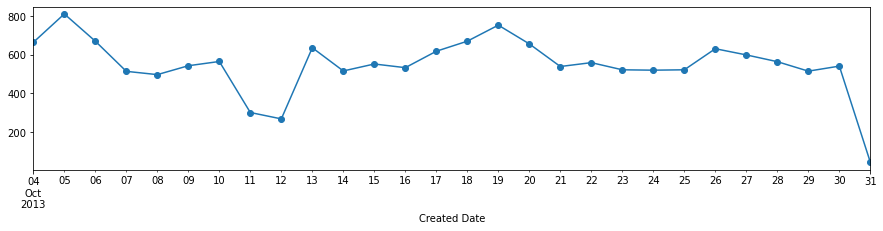

In [17]:
nypd_df.resample("D").size().plot(figsize = (15,3), marker = "o")

**(2.5) What are the top five types of complaints?**

In [18]:
nypd_df["Complaint Type"].value_counts().head(5)

Blocked Driveway           4590
Illegal Parking            3343
Noise - Commercial         2578
Noise - Street/Sidewalk    1928
Derelict Vehicle            803
Name: Complaint Type, dtype: int64

**(2.6) Extract the hour from DatetimeIndex and add it as a new column named <code>Hour</code>.**

In [19]:
nypd_df["Hour"] = nypd_df.index.hour
nypd_df.head(5)

,Closed Date,Complaint Type,Hour
Created Date,,,
2013-10-04 00:00:10,10/04/2013 01:20:52 AM,Blocked Driveway,0
2013-10-04 00:00:28,10/04/2013 04:17:32 AM,Noise - Commercial,0
2013-10-04 00:00:45,10/04/2013 01:25:01 AM,Noise - Street/Sidewalk,0
2013-10-04 00:01:05,10/04/2013 02:13:50 AM,Illegal Parking,0
2013-10-04 00:03:00,10/04/2013 02:14:57 AM,Noise - Commercial,0


**(2.7) Use a heatmap to show the number of complaints of each complaint type at different times. What types of complaints are reported most at midnight?**

<AxesSubplot:xlabel='Hour', ylabel='Complaint Type'>

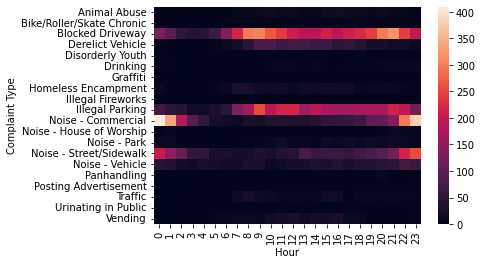

In [20]:
type_hr_ct = pd.crosstab(nypd_df["Complaint Type"], nypd_df["Hour"])
sns.heatmap(type_hr_ct)

**Write you answer here:** Noise - Commercial
    